# Anteproyecto

## Detección de Aneurismas Intracraneales

### Dayana Andrea Henao Arbeláez

## Aneurisma Cerebral

Un aneurisma cerebral o aneurisma intracraneal es una protuberancia o abombamiento en un vaso sanguíneo del cerebro. Se forma cuando una zona débil de la pared del vaso se dilata debido a la presión que ejerce la sangre que circula por él [1].

Los expertos creen que los aneurismas cerebrales se desarrollan y crecen precisamente por esa presión constante sobre un punto vulnerable de la pared vascular [1,2].

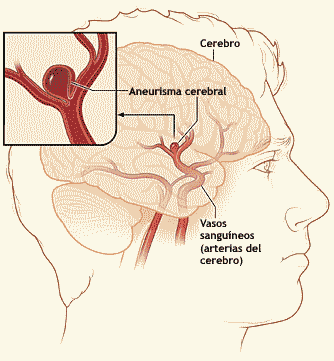

Cuando un aneurisma se rompe o presenta una fuga, provoca sangrado en el cerebro, conocido como accidente cerebrovascular hemorrágico [1]. Este tipo de evento es una emergencia médica potencialmente mortal. Se estima que los aneurismas intracraneales afectan a alrededor del 3% de la población mundial. Sin embargo, hasta un 50% se diagnostican solo después de su rotura. A nivel mundial, estos aneurismas causan cerca de 500.000 muertes al año, y aproximadamente la mitad de las víctimas son menores de 50 años [3].

A pesar de ello, los aneurismas cerebrales son relativamente comunes, y la mayoría no son graves, especialmente si son pequeños. En muchos casos, no se rompen ni causan síntomas, y suelen descubrirse de forma incidental durante estudios de imagen realizados por otras razones médicas [1,2].

Los radiólogos experimentados pueden detectar aneurismas en estudios de imagen cerebral, pero pueden pasar desapercibidos, sobre todo cuando las imágenes se obtienen con otros fines. Por eso, la detección automatizada, rápida y precisa de aneurismas en estudios cerebrales rutinarios podría ayudar a prevenir consecuencias devastadoras para los pacientes [3].

En cuanto al tratamiento, si un aneurisma no se ha roto, se evalúa cuidadosamente cada caso. Si el riesgo de tratamiento es menor que el riesgo de ruptura futura, puede recomendarse intervenir antes de que ocurra una rotura. En cambio, si el aneurisma se rompe, requiere atención médica inmediata para preservar la vida y reducir el daño cerebral [1]. 

## Objetivo del Proyecto:

Entrenar una red neuronal capaz de **detectar** y **localizar** aneurismas intracraneales a partir de imágenes médicas del cerebro.

El análisis utiliza el conjunto de datos de la competencia RSNA Intracranial Aneurysm Detection de Kaggle [3].

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import zipfile
import os
import pydicom
import matplotlib.pyplot as plt
import math

## Variables presentes en el dataset para clasificación (Aneurisma Sí/No)

| **Columna** | **Descripción** |
|--------------|----------------|
| `SeriesInstanceUID` | Identificador único para cada serie de imágenes (escaneo). |
| `Modality` | Tipo o modo de imagen médica (por ejemplo, CTA, MRA, MRI, etc.). |
| `PatientAge` | Edad del paciente al momento del estudio. |
| `PatientSex` | Sexo del paciente (M/F). |
| `Left Infraclinoid Internal Carotid Artery` | Variable binaria: 1 si hay aneurisma en esta arteria, 0 si no. |
| `Right Infraclinoid Internal Carotid Artery` | Variable binaria: 1 si hay aneurisma en esta arteria, 0 si no. |
| `Left Supraclinoid Internal Carotid Artery` | Variable binaria: 1 si hay aneurisma en esta arteria, 0 si no. |
| `Right Supraclinoid Internal Carotid Artery` | Variable binaria: 1 si hay aneurisma en esta arteria, 0 si no. |
| `Left Middle Cerebral Artery` | Variable binaria: 1 si hay aneurisma en esta arteria, 0 si no. |
| `Right Middle Cerebral Artery` | Variable binaria: 1 si hay aneurisma en esta arteria, 0 si no. |
| `Anterior Communicating Artery` | Variable binaria: 1 si hay aneurisma en esta arteria, 0 si no. |
| `Left Anterior Cerebral Artery` | Variable binaria: 1 si hay aneurisma en esta arteria, 0 si no. |
| `Right Anterior Cerebral Artery` | Variable binaria: 1 si hay aneurisma en esta arteria, 0 si no. |
| `Left Posterior Communicating Artery` | Variable binaria: 1 si hay aneurisma en esta arteria, 0 si no. |
| `Right Posterior Communicating Artery` | Variable binaria: 1 si hay aneurisma en esta arteria, 0 si no. |
| `Basilar Tip` | Variable binaria: 1 si hay aneurisma en esta región, 0 si no. |
| `Other Posterior Circulation` | Variable binaria: 1 si hay aneurisma en otra región de la circulación posterior, 0 si no. |
| `Aneurysm Present` | Variable objetivo principal (target): 1 si existe algún aneurisma en cualquier parte del escaneo, 0 si no. |


In [10]:
data=pd.DataFrame(pd.read_csv('train.csv'))
data

,SeriesInstanceUID,PatientAge,PatientSex,Modality,Left Infraclinoid Internal Carotid Artery,Right Infraclinoid Internal Carotid Artery,Left Supraclinoid Internal Carotid Artery,Right Supraclinoid Internal Carotid Artery,Left Middle Cerebral Artery,Right Middle Cerebral Artery,Anterior Communicating Artery,Left Anterior Cerebral Artery,Right Anterior Cerebral Artery,Left Posterior Communicating Artery,Right Posterior Communicating Artery,Basilar Tip,Other Posterior Circulation,Aneurysm Present
0,1.2.826.0.1.3680043.8.498.10004044428023505108...,64,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.2.826.0.1.3680043.8.498.10004684224894397679...,76,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.2.826.0.1.3680043.8.498.10005158603912009425...,58,Male,CTA,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1.2.826.0.1.3680043.8.498.10009383108068795488...,71,Male,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.8.498.10012790035410518400...,48,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4343,1.2.826.0.1.3680043.8.498.99915610493694667606...,62,Female,MRI T1post,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4344,1.2.826.0.1.3680043.8.498.99920680741054836990...,76,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4345,1.2.826.0.1.3680043.8.498.99953513260518059135...,44,Female,CTA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4346,1.2.826.0.1.3680043.8.498.99982144859397209076...,58,Female,MRI T2,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4348 entries, 0 to 4347
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   SeriesInstanceUID                           4348 non-null   object
 1   PatientAge                                  4348 non-null   int64 
 2   PatientSex                                  4348 non-null   object
 3   Modality                                    4348 non-null   object
 4   Left Infraclinoid Internal Carotid Artery   4348 non-null   int64 
 5   Right Infraclinoid Internal Carotid Artery  4348 non-null   int64 
 6   Left Supraclinoid Internal Carotid Artery   4348 non-null   int64 
 7   Right Supraclinoid Internal Carotid Artery  4348 non-null   int64 
 8   Left Middle Cerebral Artery                 4348 non-null   int64 
 9   Right Middle Cerebral Artery                4348 non-null   int64 
 10  Anterior Communicating A

In [12]:
data.describe()

,PatientAge,Left Infraclinoid Internal Carotid Artery,Right Infraclinoid Internal Carotid Artery,Left Supraclinoid Internal Carotid Artery,Right Supraclinoid Internal Carotid Artery,Left Middle Cerebral Artery,Right Middle Cerebral Artery,Anterior Communicating Artery,Left Anterior Cerebral Artery,Right Anterior Cerebral Artery,Left Posterior Communicating Artery,Right Posterior Communicating Artery,Basilar Tip,Other Posterior Circulation,Aneurysm Present
count,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000
mean,58.466881,0.017939,0.022539,0.075897,0.063937,0.050368,0.067617,0.083487,0.010580,0.012879,0.019779,0.023229,0.025299,0.025989,0.428473
std,15.841231,0.132746,0.148446,0.264864,0.244670,0.218728,0.251117,0.276648,0.102323,0.112768,0.139257,0.150648,0.157050,0.159121,0.494914
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
data.isnull().sum()

SeriesInstanceUID                             0
PatientAge                                    0
PatientSex                                    0
Modality                                      0
Left Infraclinoid Internal Carotid Artery     0
Right Infraclinoid Internal Carotid Artery    0
Left Supraclinoid Internal Carotid Artery     0
Right Supraclinoid Internal Carotid Artery    0
Left Middle Cerebral Artery                   0
Right Middle Cerebral Artery                  0
Anterior Communicating Artery                 0
Left Anterior Cerebral Artery                 0
Right Anterior Cerebral Artery                0
Left Posterior Communicating Artery           0
Right Posterior Communicating Artery          0
Basilar Tip                                   0
Other Posterior Circulation                   0
Aneurysm Present                              0
dtype: int64

In [14]:
data.columns

Index(['SeriesInstanceUID', 'PatientAge', 'PatientSex', 'Modality',
       'Left Infraclinoid Internal Carotid Artery',
       'Right Infraclinoid Internal Carotid Artery',
       'Left Supraclinoid Internal Carotid Artery',
       'Right Supraclinoid Internal Carotid Artery',
       'Left Middle Cerebral Artery', 'Right Middle Cerebral Artery',
       'Anterior Communicating Artery', 'Left Anterior Cerebral Artery',
       'Right Anterior Cerebral Artery', 'Left Posterior Communicating Artery',
       'Right Posterior Communicating Artery', 'Basilar Tip',
       'Other Posterior Circulation', 'Aneurysm Present'],
      dtype='object')

In [15]:
data['Modality']

0              MRA
1              MRA
2              CTA
3              MRA
4              MRA
           ...    
4343    MRI T1post
4344           MRA
4345           CTA
4346        MRI T2
4347           CTA
Name: Modality, Length: 4348, dtype: object

In [16]:
data['Modality'].unique()

array(['MRA', 'CTA', 'MRI T2', 'MRI T1post'], dtype=object)

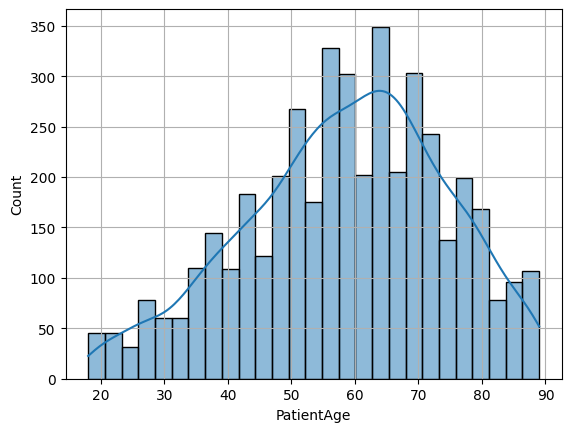

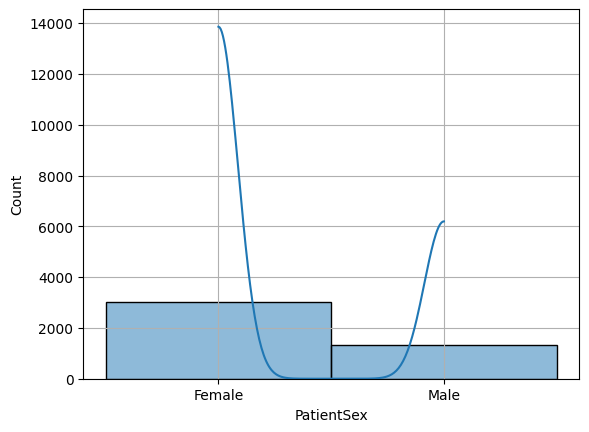

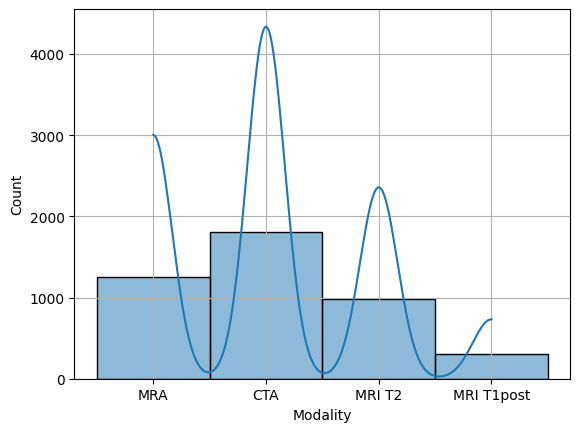

In [17]:
for i in ['PatientAge', 'PatientSex', 'Modality']:
    sns.histplot(data[i], kde=True)
    plt.grid()
    plt.show()

In [18]:
data.iloc[2]

SeriesInstanceUID                             1.2.826.0.1.3680043.8.498.10005158603912009425...
PatientAge                                                                                   58
PatientSex                                                                                 Male
Modality                                                                                    CTA
Left Infraclinoid Internal Carotid Artery                                                     0
Right Infraclinoid Internal Carotid Artery                                                    0
Left Supraclinoid Internal Carotid Artery                                                     0
Right Supraclinoid Internal Carotid Artery                                                    0
Left Middle Cerebral Artery                                                                   0
Right Middle Cerebral Artery                                                                  0
Anterior Communicating Artery           

In [47]:
data.groupby('Left Infraclinoid Internal Carotid Artery').size().reset_index(name='counts')

,Left Infraclinoid Internal Carotid Artery,counts
0,0,4270
1,1,78


In [56]:
for j in data.columns[4:]:
    print(data.groupby(j).size().reset_index(name='counts'))
    
  

   Left Infraclinoid Internal Carotid Artery  counts
0                                          0    4270
1                                          1      78
   Right Infraclinoid Internal Carotid Artery  counts
0                                           0    4250
1                                           1      98
   Left Supraclinoid Internal Carotid Artery  counts
0                                          0    4018
1                                          1     330
   Right Supraclinoid Internal Carotid Artery  counts
0                                           0    4070
1                                           1     278
   Left Middle Cerebral Artery  counts
0                            0    4129
1                            1     219
   Right Middle Cerebral Artery  counts
0                             0    4054
1                             1     294
   Anterior Communicating Artery  counts
0                              0    3985
1                              1     36

In [19]:
data.groupby('Modality').size().reset_index(name='counts')

,Modality,counts
0,CTA,1808
1,MRA,1252
2,MRI T1post,305
3,MRI T2,983


In [12]:
data.columns

Index(['SeriesInstanceUID', 'PatientAge', 'PatientSex', 'Modality',
       'Left Infraclinoid Internal Carotid Artery',
       'Right Infraclinoid Internal Carotid Artery',
       'Left Supraclinoid Internal Carotid Artery',
       'Right Supraclinoid Internal Carotid Artery',
       'Left Middle Cerebral Artery', 'Right Middle Cerebral Artery',
       'Anterior Communicating Artery', 'Left Anterior Cerebral Artery',
       'Right Anterior Cerebral Artery', 'Left Posterior Communicating Artery',
       'Right Posterior Communicating Artery', 'Basilar Tip',
       'Other Posterior Circulation', 'Aneurysm Present'],
      dtype='object')

In [20]:
modalidades_interes = ['MRA', 'CTA']
data_filtrada = data[data['Modality'].isin(modalidades_interes)]
data_filtrada['Modality'].value_counts()

data_filtrada


,SeriesInstanceUID,PatientAge,PatientSex,Modality,Left Infraclinoid Internal Carotid Artery,Right Infraclinoid Internal Carotid Artery,Left Supraclinoid Internal Carotid Artery,Right Supraclinoid Internal Carotid Artery,Left Middle Cerebral Artery,Right Middle Cerebral Artery,Anterior Communicating Artery,Left Anterior Cerebral Artery,Right Anterior Cerebral Artery,Left Posterior Communicating Artery,Right Posterior Communicating Artery,Basilar Tip,Other Posterior Circulation,Aneurysm Present
0,1.2.826.0.1.3680043.8.498.10004044428023505108...,64,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.2.826.0.1.3680043.8.498.10004684224894397679...,76,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.2.826.0.1.3680043.8.498.10005158603912009425...,58,Male,CTA,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1.2.826.0.1.3680043.8.498.10009383108068795488...,71,Male,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.8.498.10012790035410518400...,48,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4341,1.2.826.0.1.3680043.8.498.99892990973227842737...,73,Male,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4342,1.2.826.0.1.3680043.8.498.99895756899933461331...,39,Female,CTA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4344,1.2.826.0.1.3680043.8.498.99920680741054836990...,76,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4345,1.2.826.0.1.3680043.8.498.99953513260518059135...,44,Female,CTA,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# ChatGPT me ayudó a realizar este código para la extracción de imágenes 

zip_path = "/home/dayana-henao/Escritorio/rsna-intracranial-aneurysm-detection.zip"
base_extract_path = "/home/dayana-henao/Escritorio/Aprendizaje_Estadistico/Final_project/datos_aneurisma"

uid = data_filtrada['SeriesInstanceUID'][0]

# Crear la carpeta del UID dentro de datos_aneurisma
uid_folder = os.path.join(base_extract_path, uid)
os.makedirs(uid_folder, exist_ok=True)

# Extraer solo los archivos correspondientes al UID
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for member in zip_ref.namelist():
        if uid in member:
            zip_ref.extract(member, uid_folder)

print("Extracción completada para el UID:", uid)




Extracción completada para el UID: 1.2.826.0.1.3680043.8.498.10004044428023505108375152878107656647


Total de imágenes: 188


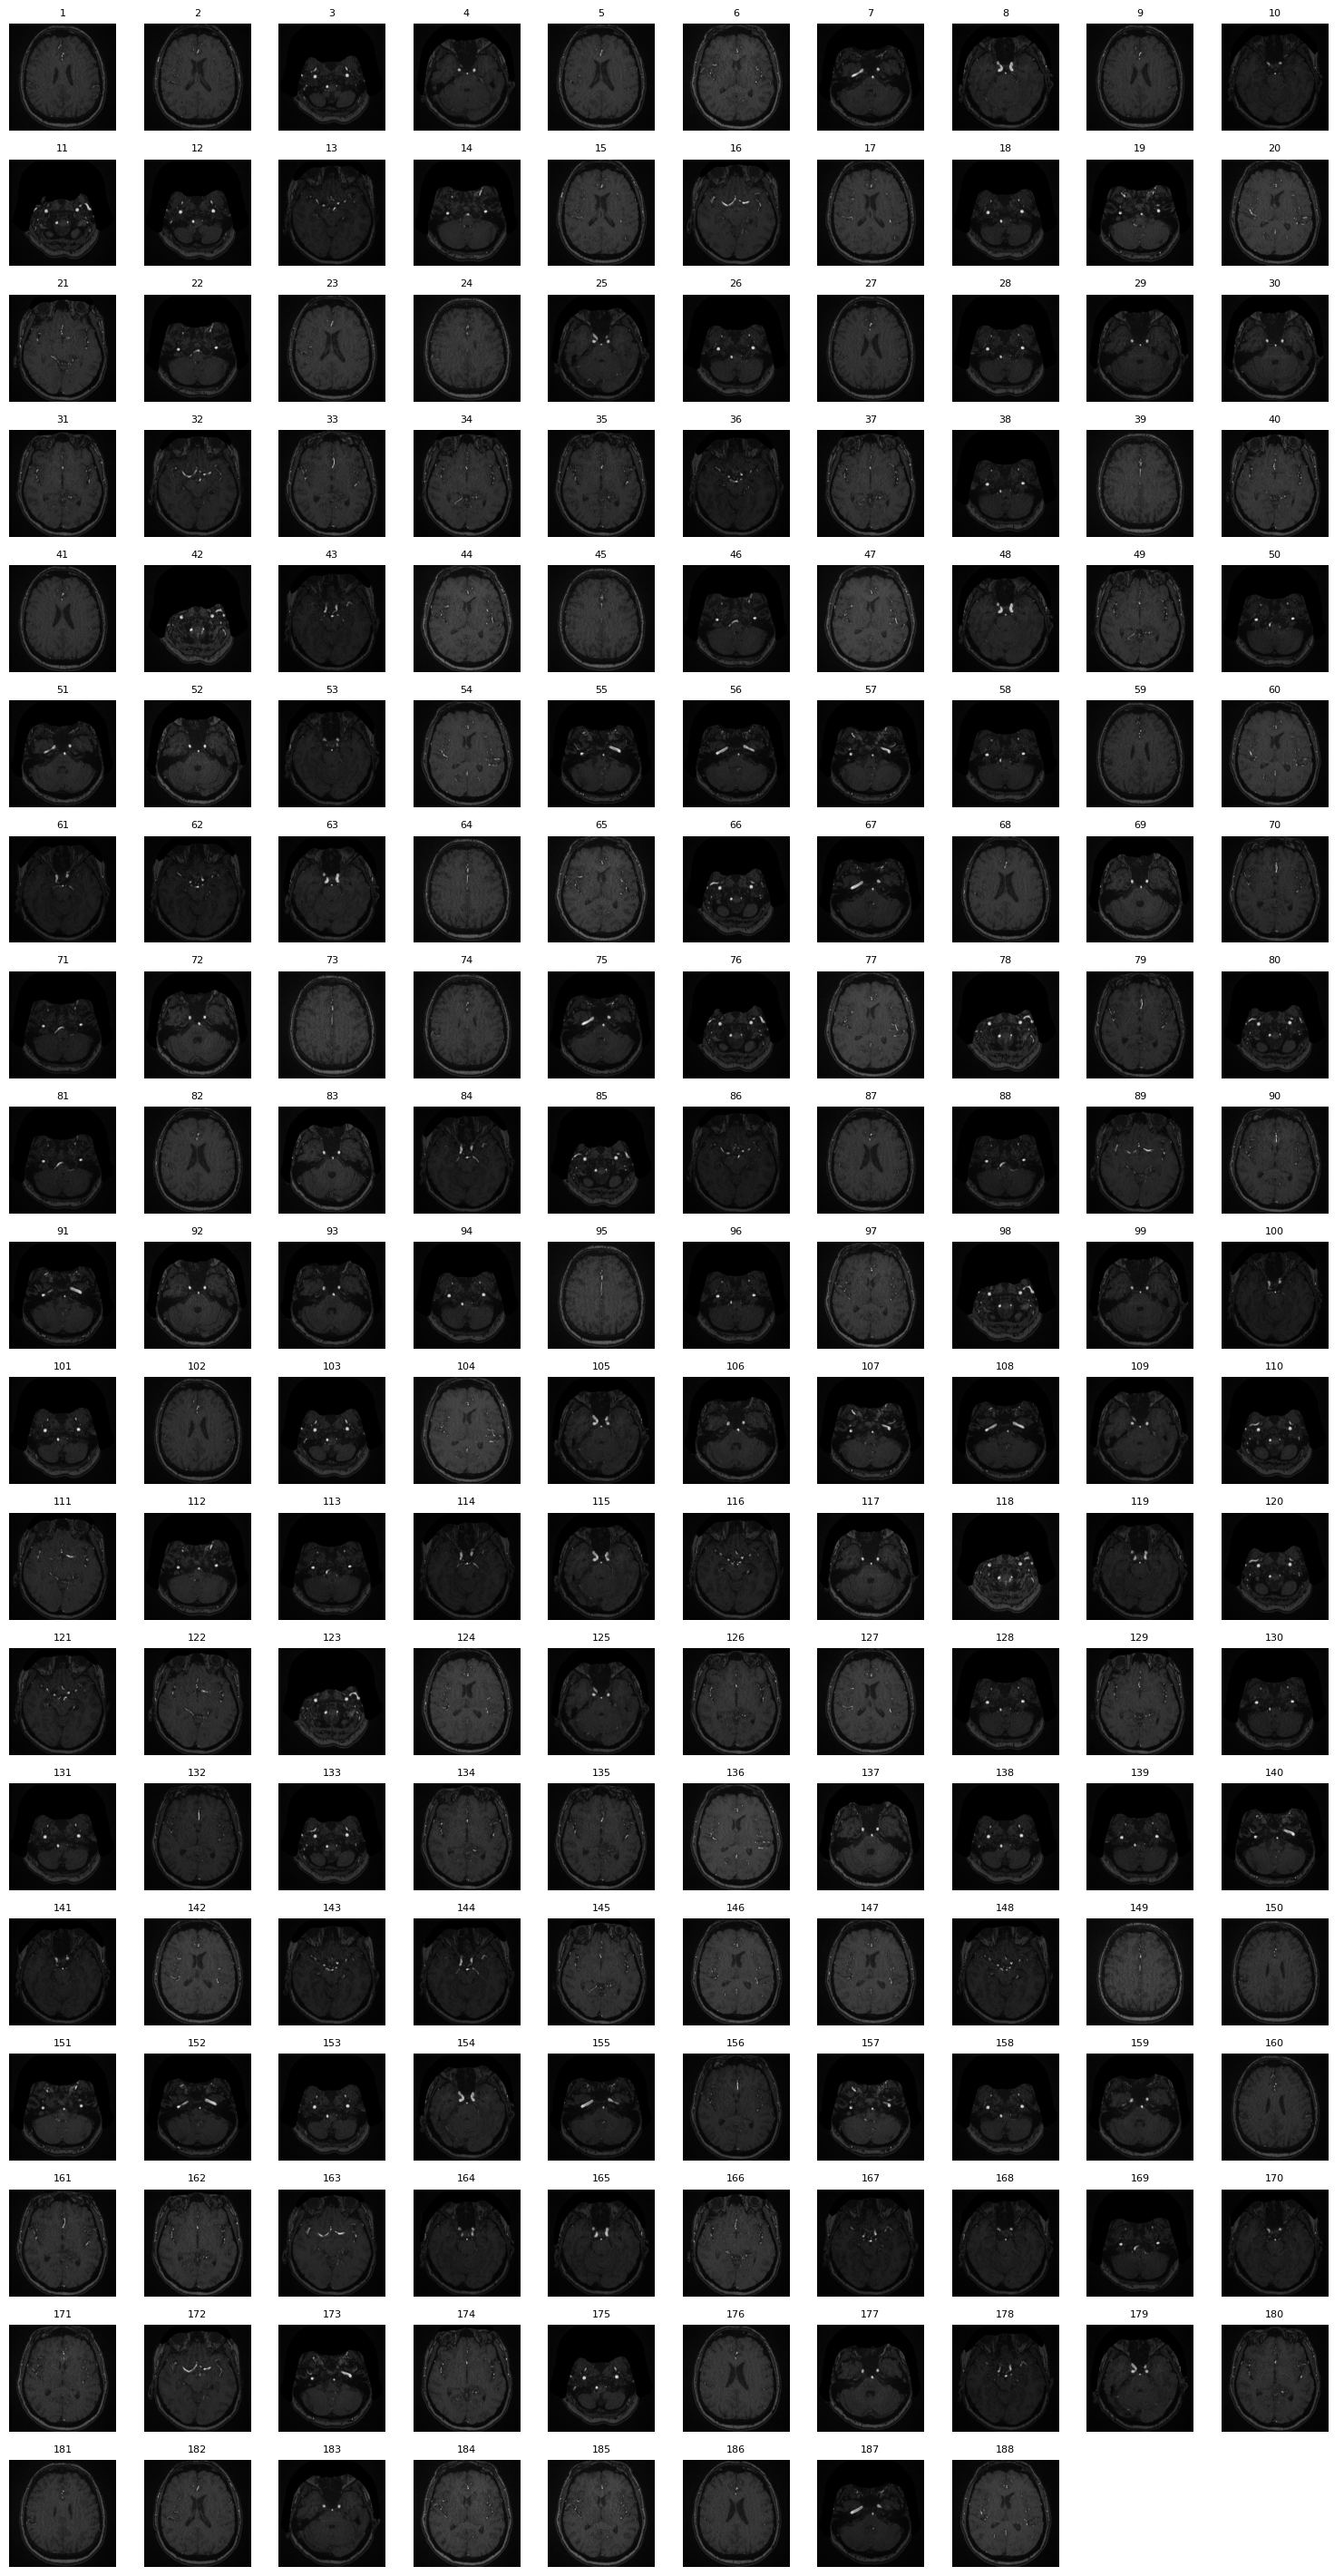

In [ ]:
# UID y ruta base
uid = data_filtrada['SeriesInstanceUID'][0]

uid_folder = f"/home/dayana-henao/Escritorio/Aprendizaje_Estadistico/Final_project/datos_aneurisma/{uid}/series/{uid}"

# Buscar y ordenar todos los archivos DICOM
dcm_files = sorted(
    [os.path.join(uid_folder, f) for f in os.listdir(uid_folder) if f.endswith(".dcm")]
)

print(f"Total de imágenes: {len(dcm_files)}")

# Leer todas las imágenes DICOM
imgs = [pydicom.dcmread(path).pixel_array for path in dcm_files]

# Definir el tamaño de la cuadrícula
n_imgs = len(imgs)
cols = 10  # número de columnas
rows = math.ceil(n_imgs / cols)

# Crear figura con subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 1.5))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < n_imgs:
        ax.imshow(imgs[i], cmap='gray')
        ax.set_title(f"{i+1}", fontsize=8)
        ax.axis('off')
    else:
        ax.axis('off')  

plt.tight_layout()
plt.show()


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 208
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.82937790386386869247861782470095425079
(0002,0010) Transfer Syntax UID                 UI: RLE Lossless
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.8
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_368'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM']
(0008,0016) SOP Class UID                       UI: MR Image Storage
(0008,0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.498.10124807242473374136099471315028464450
(0008,0020) Study Date           

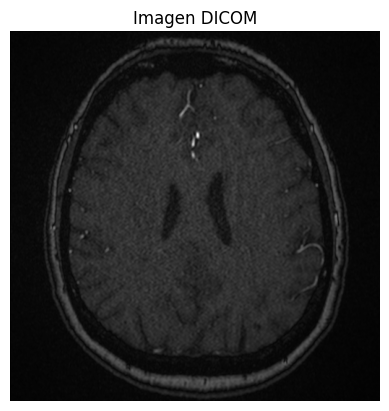

In [ ]:
# Ruta a uno de los archivos .dcm
path_dcm = f"/home/dayana-henao/Escritorio/Aprendizaje_Estadistico/Final_project/datos_aneurisma/{uid}/series/{uid}/1.2.826.0.1.3680043.8.498.10124807242473374136099471315028464450.dcm"

# Cargar el archivo
dcm = pydicom.dcmread(path_dcm)

# Mostrar información del archivo
print(dcm)

# Visualizar la imagen
plt.imshow(dcm.pixel_array, cmap='gray')
plt.title("Imagen DICOM")
plt.axis('off')
plt.show()


## Variables presentes en el dataset para localización del aneurisma 



| **Variable** | **Descripción** |
|---------------|------------------|
| `SeriesInstanceUID` | Identificador único de la serie de imágenes (conjunto de cortes DICOM que conforman un estudio). Corresponde al mismo campo en `train.csv`. |
| `SOPInstanceUID` | Identificador único de una imagen específica dentro de una serie. Cada valor corresponde a un archivo `.dcm`. |
| `coordinates` | Coordenadas (x, y) cercanas al centro del aneurisma dentro de la imagen, expresadas en píxeles. |
| `location` | Descripción textual de la ubicación anatómica del aneurisma. |


In [26]:
data_=pd.read_csv('train_localizers.csv')
data_

,SeriesInstanceUID,SOPInstanceUID,coordinates,location
0,1.2.826.0.1.3680043.8.498.10005158603912009425...,1.2.826.0.1.3680043.8.498.10775329348174902199...,"{'x': 258.3621186176837, 'y': 261.359900373599}",Other Posterior Circulation
1,1.2.826.0.1.3680043.8.498.10022796280698534221...,1.2.826.0.1.3680043.8.498.53868409774237283281...,"{'x': 194.87253141831238, 'y': 178.32675044883...",Right Middle Cerebral Artery
2,1.2.826.0.1.3680043.8.498.10023411164590664678...,1.2.826.0.1.3680043.8.498.24186535344744886473...,"{'x': 189.23979878597123, 'y': 209.19184886465...",Right Middle Cerebral Artery
3,1.2.826.0.1.3680043.8.498.10030095840917973694...,1.2.826.0.1.3680043.8.498.75217084841854214544...,"{'x': 208.2805049088359, 'y': 229.78962131837307}",Right Infraclinoid Internal Carotid Artery
4,1.2.826.0.1.3680043.8.498.10034081836061566510...,1.2.826.0.1.3680043.8.498.71237104731452368587...,"{'x': 249.86745590416498, 'y': 220.623044646393}",Anterior Communicating Artery
...,...,...,...,...
2249,1.2.826.0.1.3680043.8.498.99887675554378211308...,1.2.826.0.1.3680043.8.498.10885430363476327277...,"{'x': 204.2324966974901, 'y': 216.4332892998679}",Right Middle Cerebral Artery
2250,1.2.826.0.1.3680043.8.498.99887675554378211308...,1.2.826.0.1.3680043.8.498.75978746530527925899...,"{'x': 153.42160206895431, 'y': 188.45547208042...",Right Middle Cerebral Artery
2251,1.2.826.0.1.3680043.8.498.99892390884723813599...,1.2.826.0.1.3680043.8.498.88559536225248716051...,"{'x': 364.01486988847586, 'y': 195.33085501858...",Left Middle Cerebral Artery
2252,1.2.826.0.1.3680043.8.498.99892390884723813599...,1.2.826.0.1.3680043.8.498.41770479778255354615...,"{'x': 177.48698884758363, 'y': 210.55762081784...",Right Middle Cerebral Artery


In [27]:
data_.columns

Index(['SeriesInstanceUID', 'SOPInstanceUID', 'coordinates', 'location'], dtype='object')

In [28]:
data_['SOPInstanceUID'][0]

'1.2.826.0.1.3680043.8.498.10775329348174902199350466348663848346'

In [29]:
data_.groupby('SOPInstanceUID').size().reset_index(name='counts')

,SOPInstanceUID,counts
0,1.2.826.0.1.3680043.8.498.10004954834025258704...,1
1,1.2.826.0.1.3680043.8.498.10008247548531974669...,1
2,1.2.826.0.1.3680043.8.498.10008275100790996003...,1
3,1.2.826.0.1.3680043.8.498.10016691921126212638...,1
4,1.2.826.0.1.3680043.8.498.10017139921419623156...,1
...,...,...
2209,1.2.826.0.1.3680043.8.498.99755045998570323260...,1
2210,1.2.826.0.1.3680043.8.498.99826270310316038601...,1
2211,1.2.826.0.1.3680043.8.498.99831194919775054219...,1
2212,1.2.826.0.1.3680043.8.498.99873569653811040570...,1


In [30]:
data_groupby = data_.groupby('SeriesInstanceUID').size().reset_index(name='counts')
data_groupby

,SeriesInstanceUID,counts
0,1.2.826.0.1.3680043.8.498.10005158603912009425...,1
1,1.2.826.0.1.3680043.8.498.10022796280698534221...,1
2,1.2.826.0.1.3680043.8.498.10023411164590664678...,1
3,1.2.826.0.1.3680043.8.498.10030095840917973694...,1
4,1.2.826.0.1.3680043.8.498.10034081836061566510...,1
...,...,...
1858,1.2.826.0.1.3680043.8.498.99800061424469215274...,1
1859,1.2.826.0.1.3680043.8.498.99804081131933373817...,1
1860,1.2.826.0.1.3680043.8.498.99887675554378211308...,2
1861,1.2.826.0.1.3680043.8.498.99892390884723813599...,2


In [31]:
# Contar cuántos aneurismas hay por SeriesInstanceUID
counts = data_['SeriesInstanceUID'].value_counts().reset_index()
counts.columns = ['SeriesInstanceUID', 'num_aneurysms']

counts

,SeriesInstanceUID,num_aneurysms
0,1.2.826.0.1.3680043.8.498.31629979420404800139...,5
1,1.2.826.0.1.3680043.8.498.11292203154407642658...,5
2,1.2.826.0.1.3680043.8.498.99028068919105186302...,5
3,1.2.826.0.1.3680043.8.498.88662334466087798807...,5
4,1.2.826.0.1.3680043.8.498.76928456732082261565...,5
...,...,...
1858,1.2.826.0.1.3680043.8.498.20131714150493466791...,1
1859,1.2.826.0.1.3680043.8.498.20032274475739473270...,1
1860,1.2.826.0.1.3680043.8.498.19790772321009033575...,1
1861,1.2.826.0.1.3680043.8.498.19739832631387227431...,1


In [34]:
counts['SeriesInstanceUID'][0]

'1.2.826.0.1.3680043.8.498.31629979420404800139928339434297456334'

In [ ]:
# Código realizado con ChatGPT

zip_path = "/home/dayana-henao/Escritorio/rsna-intracranial-aneurysm-detection.zip"
base_extract_path = "/home/dayana-henao/Escritorio/Aprendizaje_Estadistico/Final_project/localizacion"

uid = counts['SeriesInstanceUID'][0]

# Crear la carpeta del UID dentro de datos_aneurisma
uid_folder = os.path.join(base_extract_path, uid)
os.makedirs(uid_folder, exist_ok=True)

# Extraer solo los archivos correspondientes al UID
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for member in zip_ref.namelist():
        if uid in member:
            zip_ref.extract(member, uid_folder)

print("Extracción completada para el UID:", uid)

✅ Extracción completada para el UID: 1.2.826.0.1.3680043.8.498.31629979420404800139928339434297456334


In [38]:
fila = data_[data_['SeriesInstanceUID'] == uid]
fila

,SeriesInstanceUID,SOPInstanceUID,coordinates,location
993,1.2.826.0.1.3680043.8.498.31629979420404800139...,1.2.826.0.1.3680043.8.498.13176478997534649879...,"{'x': 247.28734691914718, 'y': 214.95442936118...",Basilar Tip
994,1.2.826.0.1.3680043.8.498.31629979420404800139...,1.2.826.0.1.3680043.8.498.13229410441150585531...,"{'x': 313.2743157014897, 'y': 175.99069541352063}",Left Middle Cerebral Artery
995,1.2.826.0.1.3680043.8.498.31629979420404800139...,1.2.826.0.1.3680043.8.498.32474140331544345775...,"{'x': 222.77790137141997, 'y': 200.50014096124...",Right Infraclinoid Internal Carotid Artery
996,1.2.826.0.1.3680043.8.498.31629979420404800139...,1.2.826.0.1.3680043.8.498.32474140331544345775...,"{'x': 279.3381603277135, 'y': 209.29840346556017}",Left Infraclinoid Internal Carotid Artery
997,1.2.826.0.1.3680043.8.498.31629979420404800139...,1.2.826.0.1.3680043.8.498.20615944231449849310...,"{'x': 176.90124688464851, 'y': 175.36224809178...",Right Middle Cerebral Artery


In [39]:
data_['SOPInstanceUID'][993]

'1.2.826.0.1.3680043.8.498.13176478997534649879394518662623875274'

In [40]:
import ast
ast.literal_eval(data_['coordinates'][993])['x']

247.28734691914718

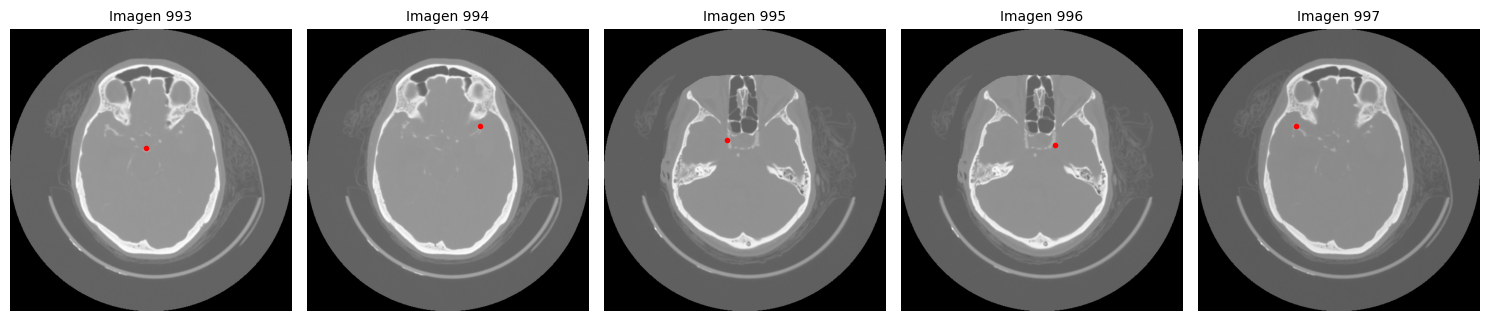

In [45]:
indices = range(993, 998)

# UID de la serie (igual que en tu código)
uid = counts['SeriesInstanceUID'][0]

# Crear figura con subplots (una fila de 5 columnas)
fig, axes = plt.subplots(1, len(indices), figsize=(15, 4))

for ax, i in zip(axes, indices):
    a = data_['SOPInstanceUID'][i]
    path_dcm = f"/home/dayana-henao/Escritorio/Aprendizaje_Estadistico/Final_project/localizacion/{uid}/series/{uid}/{a}.dcm"

    # Cargar imagen DICOM
    dcm = pydicom.dcmread(path_dcm)
    img = dcm.pixel_array

    # Extraer coordenadas
    coords = ast.literal_eval(data_['coordinates'][i])
    x, y = coords['x'], coords['y']

    # Mostrar imagen y punto
    ax.imshow(img, cmap='gray')
    ax.plot(x, y, 'r.', markersize=6)
    ax.set_title(f"Imagen {i}", fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 208
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.38386419073138984490347255450984518605
(0002,0010) Transfer Syntax UID                 UI: RLE Lossless
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.8
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_368'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.498.13176478997534649879394518662623875274
(0008,0060) Modality                       

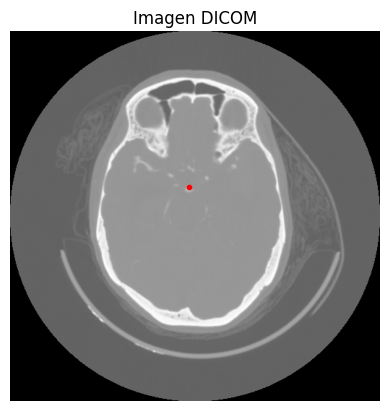

In [ ]:
a=data_['SOPInstanceUID'][993]
# Ruta a uno de los archivos .dcm
path_dcm = f"/home/dayana-henao/Escritorio/Aprendizaje_Estadistico/Final_project/localizacion/{uid}/series/{uid}/{a}.dcm"

# Cargar el archivo
dcm = pydicom.dcmread(path_dcm)

# Mostrar información del archivo
print(dcm)

# Visualizar la imagen
plt.imshow(dcm.pixel_array, cmap='gray')
plt.plot(ast.literal_eval(data_['coordinates'][993])['x'], ast.literal_eval(data_['coordinates'][993])['y'], 'r.')
plt.title("Imagen DICOM")
plt.axis('off')
plt.show()


In [49]:
# Obtener la matriz de píxeles
img = dcm.pixel_array

print(f"Dimensiones de la imagen: {img.shape}")
print(f"Número total de píxeles: {img.size}")

Dimensiones de la imagen: (512, 512)
Número total de píxeles: 262144


Zoom a la imagen para visualizar el aneurisma. 

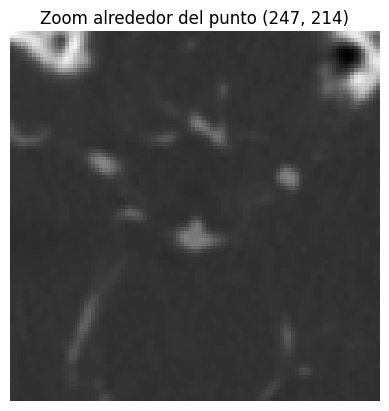

In [ ]:
coords = ast.literal_eval(data_['coordinates'][993])
x = int(coords['x'])
y = int(coords['y'])

# Tamaño de la ventana de zoom 
zoom_size = 50

# Definir límites, asegurando que estén dentro de la imagen
x_min = max(0, x - zoom_size)
x_max = min(img.shape[1], x + zoom_size)
y_min = max(0, y - zoom_size)
y_max = min(img.shape[0], y + zoom_size)

# Recortar la región de interés
zoom_region = img[y_min:y_max, x_min:x_max]

# Mostrar el zoom
plt.imshow(zoom_region, cmap='gray')
plt.title(f"Zoom alrededor del punto ({x}, {y})")
plt.axis('off')
plt.show()



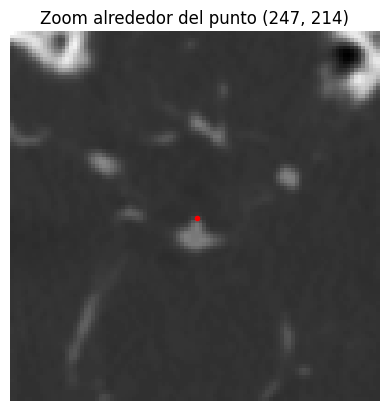

In [ ]:
x_local = x - x_min
y_local = y - y_min

# Mostrar zoom con punto
plt.imshow(zoom_region, cmap='gray')
plt.plot(x_local, y_local, 'r.', markersize=6)
plt.title(f"Zoom alrededor del punto ({x}, {y})")
plt.axis('off')
plt.show()

## Referencias 

[1] Mayo Clinic. Aneurisma cerebral: síntomas y causas. Recuperado el 31 de octubre de 2025, de https://www.mayoclinic.org/es/diseases-conditions/brain-aneurysm/symptoms-causes/syc-20361483

[2] American Stroke Association. Let’s Talk About Brain Aneurysms. Recuperado el 17 de octubre de 2025, de https://www.stroke.org/es/help-and-support/resource-library/lets-talk-about-stroke/brain-aneurysms

[3] RSNA Intracranial Aneurysm Detection. Datos de la competencia de Kaggle. Kaggle, Inc. Disponible en: https://www.kaggle.com/competitions/rsna-intracranial-aneurysm-detection/data?select=train_localizers.csv
 (consultado el 17 de octubre).

[4] OpenAI. (2025). Asistencia en la redacción y análisis para el proyecto sobre detección de aneurismas intracraneales con deep learning, mediante ChatGPT (versión GPT-5). Recuperado de https://chat.openai.com